In [21]:
print("Loading Libraries...")
import os, sys
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scin
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn import neighbors, datasets
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [3]:
#Local
print("Loading directories..")
path_coords = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/15_results/coords'
path_rms = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/15_results/rms'
path_plots = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/15_results/plots'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [22]:
#enterprise
print("Loading directories..")
path_coords = '/media/picard/data/anaconda/JJs_PHD/15_results/coords'
path_rms = '/media/picard/data/anaconda/JJs_PHD/15_results/rms'
path_plots = '/media/picard/data/anaconda/JJs_PHD/15_results/plots'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [23]:
os.chdir(path_coords)
coordlist = os.listdir(path_coords)
os.chdir(path_rms)
rmslist = os.listdir(path_rms)

In [24]:
coordlist = sorted(coordlist)
coordlist

['int-01_acu_coords.dat',
 'int-02_acu_coords.dat',
 'int-03_acu_coords.dat',
 'int-04_acu_coords.dat',
 'int-05_acu_coords.dat',
 'int-06_acu_coords.dat',
 'int-07_acu_coords.dat',
 'int-08_acu_coords.dat',
 'int-09_acu_coords.dat',
 'int-10_acu_coords.dat',
 'int-11_acu_coords.dat',
 'int-12_acu_coords.dat',
 'int-tip_acu_coords.dat',
 'lead_acu_coords.dat',
 'pside_acu_coords.dat',
 'sside_acu_coords.dat',
 'tip_acu_coords.dat',
 'trail_acu_coords.dat']

In [25]:
rmslist = sorted(rmslist)
rmslist

['int-01-rms.dat',
 'int-02-rms.dat',
 'int-03-rms.dat',
 'int-04-rms.dat',
 'int-05-rms.dat',
 'int-06-rms.dat',
 'int-07-rms.dat',
 'int-08-rms.dat',
 'int-09-rms.dat',
 'int-10-rms.dat',
 'int-11-rms.dat',
 'int-12-rms.dat',
 'int-tip-rms.dat',
 'lead-rms.dat',
 'pside-rms.dat',
 'sside-rms.dat',
 'tip-rms.dat',
 'trail-rms.dat']

In [26]:
batch_spl = pd.DataFrame()
os.chdir(path_rms)
for file in rmslist:
    batch_spl[file] = pd.read_csv(file).set_index('nodenumber')['sound-pressure']
    print(str(file) + " done...")

int-01-rms.dat done...
int-02-rms.dat done...
int-03-rms.dat done...
int-04-rms.dat done...
int-05-rms.dat done...
int-06-rms.dat done...
int-07-rms.dat done...
int-08-rms.dat done...
int-09-rms.dat done...
int-10-rms.dat done...
int-11-rms.dat done...
int-12-rms.dat done...
int-tip-rms.dat done...
lead-rms.dat done...
pside-rms.dat done...
sside-rms.dat done...
tip-rms.dat done...
trail-rms.dat done...


In [27]:
batch_spldb = pd.DataFrame()
os.chdir(path_rms)
for file in rmslist:
    batch_spldb[file] = pd.read_csv(file).set_index('nodenumber')['rms_spldb']
    print(str(file) + " done...")

int-01-rms.dat done...
int-02-rms.dat done...
int-03-rms.dat done...
int-04-rms.dat done...
int-05-rms.dat done...
int-06-rms.dat done...
int-07-rms.dat done...
int-08-rms.dat done...
int-09-rms.dat done...
int-10-rms.dat done...
int-11-rms.dat done...
int-12-rms.dat done...
int-tip-rms.dat done...
lead-rms.dat done...
pside-rms.dat done...
sside-rms.dat done...
tip-rms.dat done...
trail-rms.dat done...


In [28]:
batch_spl.max()
#nk_max = df_by_year['n_killed'].max()

int-01-rms.dat      3831.326038
int-02-rms.dat      4859.869523
int-03-rms.dat      4409.602860
int-04-rms.dat      3959.007068
int-05-rms.dat      5926.393529
int-06-rms.dat      7101.687874
int-07-rms.dat      7310.786972
int-08-rms.dat      7153.365277
int-09-rms.dat      4265.520832
int-10-rms.dat      4250.232876
int-11-rms.dat      9351.939282
int-12-rms.dat     11564.934928
int-tip-rms.dat    13370.032466
lead-rms.dat        3944.894484
pside-rms.dat       5053.924580
sside-rms.dat       4889.496220
tip-rms.dat        13917.394819
trail-rms.dat       9857.909976
dtype: float64

In [29]:
batch_spl.idxmax()

int-01-rms.dat     32885
int-02-rms.dat     32056
int-03-rms.dat     31439
int-04-rms.dat     31064
int-05-rms.dat     31138
int-06-rms.dat     31406
int-07-rms.dat     30573
int-08-rms.dat     31360
int-09-rms.dat     31467
int-10-rms.dat     19434
int-11-rms.dat     13408
int-12-rms.dat     14150
int-tip-rms.dat    28105
lead-rms.dat        8678
pside-rms.dat      23132
sside-rms.dat       1512
tip-rms.dat        13190
trail-rms.dat        109
dtype: int64

In [30]:
batch_spl.min()

int-01-rms.dat      19.803784
int-02-rms.dat      20.704178
int-03-rms.dat      15.225364
int-04-rms.dat      14.813403
int-05-rms.dat      14.898829
int-06-rms.dat      15.123534
int-07-rms.dat      14.991045
int-08-rms.dat      12.728111
int-09-rms.dat      11.604789
int-10-rms.dat       9.563179
int-11-rms.dat       7.256905
int-12-rms.dat       7.734093
int-tip-rms.dat      8.457578
lead-rms.dat        16.456402
pside-rms.dat       16.456402
sside-rms.dat       13.626743
tip-rms.dat         54.065804
trail-rms.dat      537.706440
dtype: float64

In [31]:
batch_spl.idxmin()

int-01-rms.dat        18
int-02-rms.dat        12
int-03-rms.dat      2888
int-04-rms.dat      3713
int-05-rms.dat      3302
int-06-rms.dat        31
int-07-rms.dat      3414
int-08-rms.dat      4033
int-09-rms.dat        45
int-10-rms.dat        13
int-11-rms.dat         7
int-12-rms.dat        15
int-tip-rms.dat       11
lead-rms.dat        6074
pside-rms.dat       9494
sside-rms.dat      32232
tip-rms.dat         1749
trail-rms.dat       1677
dtype: int64

In [32]:
batch_spldb.max()

int-01-rms.dat     165.646382
int-02-rms.dat     167.711892
int-03-rms.dat     166.867390
int-04-rms.dat     165.931126
int-05-rms.dat     169.435210
int-06-rms.dat     171.006632
int-07-rms.dat     171.258683
int-08-rms.dat     171.069608
int-09-rms.dat     166.578841
int-10-rms.dat     166.547655
int-11-rms.dat     173.397434
int-12-rms.dat     175.242264
int-tip-rms.dat    176.502049
lead-rms.dat       165.900108
pside-rms.dat      168.051975
sside-rms.dat      167.764682
tip-rms.dat        176.850559
trail-rms.dat      173.855097
dtype: float64

In [33]:
batch_spldb.min()

int-01-rms.dat     119.914364
int-02-rms.dat     120.300560
int-03-rms.dat     117.630754
int-04-rms.dat     117.392497
int-05-rms.dat     117.442443
int-06-rms.dat     117.572466
int-07-rms.dat     117.496038
int-08-rms.dat     116.074679
int-09-rms.dat     115.272145
int-10-rms.dat     113.591445
int-11-rms.dat     111.194429
int-12-rms.dat     111.747588
int-tip-rms.dat    112.524320
lead-rms.dat       118.306098
pside-rms.dat      118.306098
sside-rms.dat      116.667241
tip-rms.dat        128.637853
trail-rms.dat      148.590305
dtype: float64

In [34]:
batch_sil = pd.DataFrame()
os.chdir(path_rms)
i = 0
while i < 13:
    batch_sil[rmslist[i]] = pd.read_csv(rmslist[i]).set_index('nodenumber')['sound-intensity']
    print(str(rmslist[i]) + " done...")
    i = i + 1

int-01-rms.dat done...
int-02-rms.dat done...
int-03-rms.dat done...
int-04-rms.dat done...
int-05-rms.dat done...
int-06-rms.dat done...
int-07-rms.dat done...
int-08-rms.dat done...
int-09-rms.dat done...
int-10-rms.dat done...
int-11-rms.dat done...
int-12-rms.dat done...
int-tip-rms.dat done...


In [35]:
batch_sildb = pd.DataFrame()
os.chdir(path_rms)
i = 0
while i < 13:
    batch_sildb[rmslist[i]] = pd.read_csv(rmslist[i]).set_index('nodenumber')['rms_sildb']
    print(str(rmslist[i]) + " done...")
    i = i + 1

int-01-rms.dat done...
int-02-rms.dat done...
int-03-rms.dat done...
int-04-rms.dat done...
int-05-rms.dat done...
int-06-rms.dat done...
int-07-rms.dat done...
int-08-rms.dat done...
int-09-rms.dat done...
int-10-rms.dat done...
int-11-rms.dat done...
int-12-rms.dat done...
int-tip-rms.dat done...


In [36]:
pd.options.mode.use_inf_as_na = True
batch_sildb.fillna(0, inplace=True)

In [37]:
batch_sil.max()

int-01-rms.dat     1.493232e+05
int-02-rms.dat     2.400160e+05
int-03-rms.dat     1.814159e+05
int-04-rms.dat     1.357694e+05
int-05-rms.dat     2.814335e+05
int-06-rms.dat     4.075928e+05
int-07-rms.dat     3.549267e+05
int-08-rms.dat     3.162401e+05
int-09-rms.dat     1.272426e+05
int-10-rms.dat     9.136533e+04
int-11-rms.dat     3.699099e+05
int-12-rms.dat     6.214451e+05
int-tip-rms.dat    1.145618e+06
dtype: float64

In [38]:
batch_sil.min()

int-01-rms.dat     0.0
int-02-rms.dat     0.0
int-03-rms.dat     0.0
int-04-rms.dat     0.0
int-05-rms.dat     0.0
int-06-rms.dat     0.0
int-07-rms.dat     0.0
int-08-rms.dat     0.0
int-09-rms.dat     0.0
int-10-rms.dat     0.0
int-11-rms.dat     0.0
int-12-rms.dat     0.0
int-tip-rms.dat    0.0
dtype: float64

In [39]:
batch_sildb.max()

int-01-rms.dat     171.741274
int-02-rms.dat     173.802402
int-03-rms.dat     172.586754
int-04-rms.dat     171.328019
int-05-rms.dat     174.493759
int-06-rms.dat     176.102265
int-07-rms.dat     175.501387
int-08-rms.dat     175.000169
int-09-rms.dat     171.046325
int-10-rms.dat     169.607814
int-11-rms.dat     175.680959
int-12-rms.dat     177.934028
int-tip-rms.dat    180.590396
dtype: float64

In [40]:
batch_sildb.min()

int-01-rms.dat     0.0
int-02-rms.dat     0.0
int-03-rms.dat     0.0
int-04-rms.dat     0.0
int-05-rms.dat     0.0
int-06-rms.dat     0.0
int-07-rms.dat     0.0
int-08-rms.dat     0.0
int-09-rms.dat     0.0
int-10-rms.dat     0.0
int-11-rms.dat     0.0
int-12-rms.dat     0.0
int-tip-rms.dat    0.0
dtype: float64

In [41]:
#sound pressure at internals
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['sound-pressure'] #data['rms_spldb']
    spl_max = spl.max()
    spl_idxmax = spl.idxmax()
    spl_min = spl.min()
    spl_idxmin = spl.idxmin()
    coords_spl_max = coords.loc[spl.idxmax()]
    coords_spl_min = coords.loc[spl.idxmin()]
    
    text_1 = str('Max RMS SPL ' + str(round(spl_max, 2)) + ' at node: ')
    text_x1 = str('x = ' + str(round(coords_spl_max[0], 4)))
    text_y1 = str('y = ' + str(round(coords_spl_max[1], 4)))
    text_z1 = str('z = ' + str(round(coords_spl_max[2], 4)))
    text_2 = str('Min RMS SPL ' + str(round(spl_min, 2)) + ' at node: ')
    text_x2 = str('x = ' + str(round(coords_spl_min[0], 4)))
    text_y2 = str('y = ' + str(round(coords_spl_min[1], 4)))
    text_z2 = str('z = ' + str(round(coords_spl_min[2], 4))) 
    
    sound_pressure_plot, ax0 = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
    spl_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=1.5e04, clip=False))
    sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="vertical", pad=0.1)
    ax0.set_title(str('RMS sound pressure at ' + str(location) + ' [Pa]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    ax0.set_xlabel('z - coordinate')
    ax0.set_ylabel('x - coordinate')
    ax0.text(-0.040, 0.136, text_1)
    ax0.text(-0.040, 0.126, text_x1)
    ax0.text(-0.040, 0.116, text_y1)
    ax0.text(-0.040, 0.106, text_z1)
    ax0.text(-0.040, 0.091, text_2)
    ax0.text(-0.040, 0.081, text_x2)
    ax0.text(-0.040, 0.071, text_y2)
    ax0.text(-0.040, 0.061, text_z2)
    plt.grid()
    #plt.show()
    os.chdir(path_plots)
    plt.savefig(str(str(location) + '-rms-spl.png'), bbox_inches='tight')
    plt.close()
    
    i = i+1
print("Exiting plotting loop...")

Exiting plotting loop...


In [42]:
# SPLDB at internals
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['rms_spldb']
    spl_max = spl.max()
    spl_idxmax = spl.idxmax()
    spl_min = spl.min()
    spl_idxmin = spl.idxmin()
    coords_spl_max = coords.loc[spl.idxmax()]
    coords_spl_min = coords.loc[spl.idxmin()]
    
    text_1 = str('Max RMS SPLdB ' + str(round(spl_max, 2)) + ' at node: ')
    text_x1 = str('x = ' + str(round(coords_spl_max[0], 4)))
    text_y1 = str('y = ' + str(round(coords_spl_max[1], 4)))
    text_z1 = str('z = ' + str(round(coords_spl_max[2], 4)))
    text_2 = str('Min RMS SPLdB ' + str(round(spl_min, 2)) + ' at node: ')
    text_x2 = str('x = ' + str(round(coords_spl_min[0], 4)))
    text_y2 = str('y = ' + str(round(coords_spl_min[1], 4)))
    text_z2 = str('z = ' + str(round(coords_spl_min[2], 4))) 

    sound_pressure_plot, ax0 = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
    spl_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.jet, vmin=110, vmax=180)
    sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="vertical", pad=0.1)
    ax0.set_title(str('RMS SPLdB at ' + str(location) + ' [dB]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    ax0.set_xlabel('z - coordinate')
    ax0.set_ylabel('x - coordinate')
    ax0.text(-0.040, 0.136, text_1)
    ax0.text(-0.040, 0.126, text_x1)
    ax0.text(-0.040, 0.116, text_y1)
    ax0.text(-0.040, 0.106, text_z1)
    ax0.text(-0.040, 0.091, text_2)
    ax0.text(-0.040, 0.081, text_x2)
    ax0.text(-0.040, 0.071, text_y2)
    ax0.text(-0.040, 0.061, text_z2)
    plt.grid()
    #plt.show()
    os.chdir(path_plots)
    plt.savefig(str(str(location) + '-rms-spldb.png'), bbox_inches='tight')
    plt.close()
    
    i = i+1
print("Exiting plotting loop...")

Exiting plotting loop...


In [43]:
#sound intensity at intenals
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    sil = data['sound-intensity'] #data['rms_sildb']
    sil_max = sil.max()
    sil_idxmax = spl.idxmax()
    sil_min = sil.min()
    sil_idxmin = sil.idxmin()
    coords_sil_max = coords.loc[sil.idxmax()]
    coords_sil_min = coords.loc[sil.idxmin()]
    
    text_1 = str('Max RMS sound intensity ' + str(round(sil_max, 2)) + ' at node: ')
    text_x1 = str('x = ' + str(round(coords_sil_max[0], 4)))
    text_y1 = str('y = ' + str(round(coords_sil_max[1], 4)))
    text_z1 = str('z = ' + str(round(coords_sil_max[2], 4)))
    #text_2 = str('Min RMS sound intensity ' + str(round(sil_min, 2)) + ' at node: ')
    #text_x2 = str('x = ' + str(round(coords_sil_min[0], 4)))
    #text_y2 = str('y = ' + str(round(coords_sil_min[1], 4)))
    #text_z2 = str('z = ' + str(round(coords_sil_min[2], 4))) 

    sound_pressure_plot, ax0 = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
    sil_plot = ax0.scatter(z, x, c=sil, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=1.2e06, clip=False))
    sound_pressure_plot.colorbar(sil_plot, ax=ax0, orientation="vertical", pad=0.1)
    ax0.set_title(str('RMS sound intensity at ' + str(location) + ' [W/m2]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    ax0.set_xlabel('z - coordinate')
    ax0.set_ylabel('x - coordinate')
    ax0.text(-0.040, 0.136, text_1)
    ax0.text(-0.040, 0.126, text_x1)
    ax0.text(-0.040, 0.116, text_y1)
    ax0.text(-0.040, 0.106, text_z1)
    #ax0.text(-0.040, 0.091, text_2)
    #ax0.text(-0.040, 0.081, text_x2)
    #ax0.text(-0.040, 0.071, text_y2)
    #ax0.text(-0.040, 0.061, text_z2)
    plt.grid()
    #plt.show()
    os.chdir(path_plots)
    plt.savefig(str(str(location) + '-rms-sil.png'), bbox_inches='tight')
    plt.close()
    
    i = i+1
print("Exiting plotting loop...")

Exiting plotting loop...


In [44]:
#SILdB at internals
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    sil = data['rms_sildb']
    sil_max = sil.max()
    sil_idxmax = spl.idxmax()
    sil_min = sil.min()
    sil_idxmin = sil.idxmin()
    coords_sil_max = coords.loc[sil.idxmax()]
    coords_sil_min = coords.loc[sil.idxmin()]
    
    text_1 = str('Max RMS SILdB ' + str(round(sil_max, 2)) + ' at node: ')
    text_x1 = str('x = ' + str(round(coords_sil_max[0], 4)))
    text_y1 = str('y = ' + str(round(coords_sil_max[1], 4)))
    text_z1 = str('z = ' + str(round(coords_sil_max[2], 4)))  
    #text_2 = str('Min RMS sound intensity ' + str(round(sil_min, 2)) + ' at node: ')
    #text_x2 = str('x = ' + str(round(coords_sil_min[0], 4)))
    #text_y2 = str('y = ' + str(round(coords_sil_min[1], 4)))
    #text_z2 = str('z = ' + str(round(coords_sil_min[2], 4)))
    
    sound_pressure_plot, ax0 = plt.subplots(1, 1, figsize=(6, 6), dpi=150)
    sil_plot = ax0.scatter(z, x, c=sil, s=0.5, cmap=plt.cm.jet, vmin=1, vmax=185)
    sound_pressure_plot.colorbar(sil_plot, ax=ax0, orientation="vertical", pad=0.1)
    ax0.set_title(str('RMS SILdB at ' + str(location) + ' [dB]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    ax0.set_xlabel('z - coordinate')
    ax0.set_ylabel('x - coordinate')
    ax0.text(-0.040, 0.136, text_1)
    ax0.text(-0.040, 0.126, text_x1)
    ax0.text(-0.040, 0.116, text_y1)
    ax0.text(-0.040, 0.106, text_z1)
    #ax0.text(-0.040, 0.091, text_2)
    #ax0.text(-0.040, 0.081, text_x2)
    #ax0.text(-0.040, 0.071, text_y2)
    #ax0.text(-0.040, 0.061, text_z2)
    plt.grid()
    #plt.show()
    os.chdir(path_plots)
    plt.savefig(str(str(location) + '-rms-sildb.png'), bbox_inches='tight')
    plt.close()
    
    i = i+1
print("Exiting plotting loop...")

Exiting plotting loop...


In [8]:
os.chdir(path_coords)

coords_pside = pd.DataFrame(pd.read_csv('pside_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_pside = coords_pside['x-coordinate']
y_pside = coords_pside['y-coordinate']
z_pside = coords_pside['z-coordinate']

coords_sside = pd.DataFrame(pd.read_csv('sside_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_sside = coords_sside['x-coordinate']
y_sside = coords_sside['y-coordinate']
z_sside = coords_sside['z-coordinate']

coords_lead = pd.DataFrame(pd.read_csv('lead_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_lead = coords_lead['x-coordinate']
y_lead = coords_lead['y-coordinate']
z_lead = coords_lead['z-coordinate']

coords_trail = pd.DataFrame(pd.read_csv('trail_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_trail = coords_trail['x-coordinate']
y_trail = coords_trail['y-coordinate']
z_trail = coords_trail['z-coordinate']

coords_tip = pd.DataFrame(pd.read_csv('tip_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_tip = coords_tip['x-coordinate']
y_tip = coords_tip['y-coordinate']
z_tip = coords_tip['z-coordinate']

In [ ]:
#### New experimental stuff

<function matplotlib.pyplot.close(*args)>

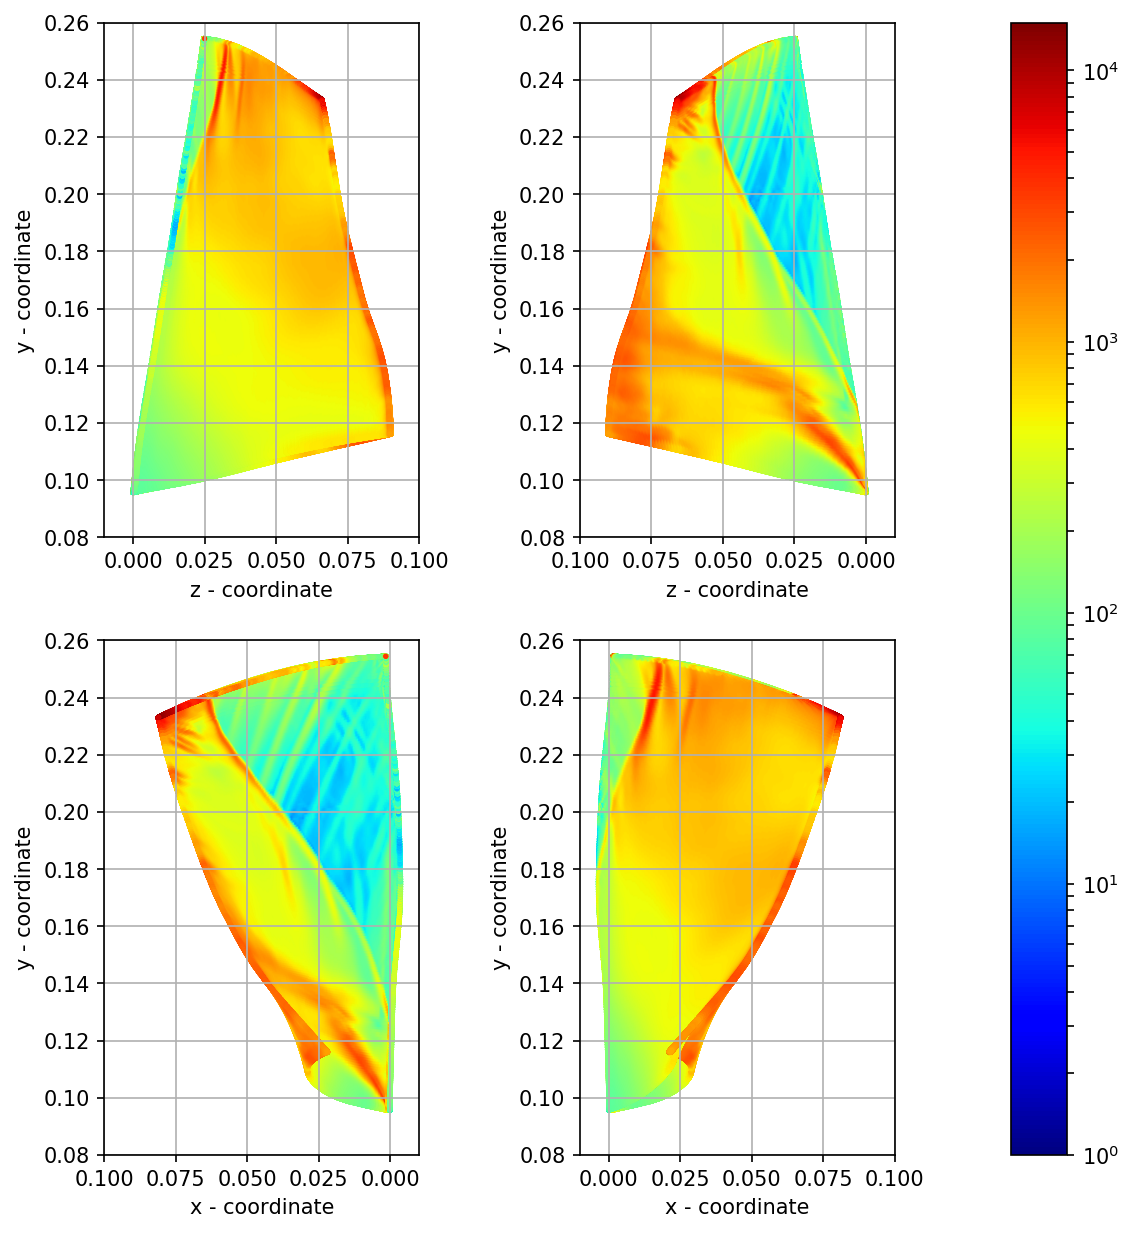

In [19]:
os.chdir(path_rms)

data_pside = pd.DataFrame(pd.read_csv('pside-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_pside = data_pside['sound-pressure'] #data['rms_spldb']

data_sside = pd.DataFrame(pd.read_csv('sside-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_sside = data_sside['sound-pressure'] #data['rms_spldb']

data_lead = pd.DataFrame(pd.read_csv('lead-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_lead = data_lead['sound-pressure'] #data['rms_spldb']

data_trail = pd.DataFrame(pd.read_csv('trail-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_trail = data_trail['sound-pressure'] #data['rms_spldb']

data_tip = pd.DataFrame(pd.read_csv('tip-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_tip = data_tip['sound-pressure'] #data['rms_spldb']

sound_pressure_plot, ax0 = plt.subplots(2, 2, figsize=(10, 10), dpi=150)
#sound_pressure_plot.suptitle('RMS sound pressure at blade [Pa]')

spl_plot = ax0[0][0].scatter(z_sside, y_sside, c=spl_sside, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][0].scatter(z_tip, y_tip, c=spl_tip, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][0].scatter(z_trail, y_trail, c=spl_trail, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][0].scatter(z_pside, y_pside, c=spl_pside, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][0].scatter(z_lead, y_lead, c=spl_lead, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][0].set_aspect('equal', 'box')
ax0[0][0].set_xlim(-0.01, 0.1)
ax0[0][0].set_ylim(0.08, 0.260)
ax0[0][0].set_xlabel('z - coordinate')
ax0[0][0].set_ylabel('y - coordinate')
ax0[0][0].grid()

ax0[0][1].scatter(z_lead, y_lead, c=spl_lead, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][1].scatter(z_pside, y_pside, c=spl_pside, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][1].scatter(z_trail, y_trail, c=spl_trail, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][1].scatter(z_tip, y_tip, c=spl_tip, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][1].scatter(z_sside, y_sside, c=spl_sside, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[0][1].set_aspect('equal', 'box')
ax0[0][1].set_xlim(-0.01, 0.1)
ax0[0][1].set_ylim(0.08, 0.260)
ax0[0][1].invert_xaxis()
ax0[0][1].set_xlabel('z - coordinate')
ax0[0][1].set_ylabel('y - coordinate')
ax0[0][1].grid()

ax0[1][0].scatter(x_trail, y_trail, c=spl_trail, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][0].scatter(x_pside, y_pside, c=spl_pside, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][0].scatter(x_sside, y_sside, c=spl_sside, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][0].scatter(x_tip, y_tip, c=spl_tip, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][0].scatter(x_lead, y_lead, c=spl_lead, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][0].set_aspect('equal', 'box')
ax0[1][0].set_xlim(-0.01, 0.1)
ax0[1][0].set_ylim(0.08, 0.260)
ax0[1][0].invert_xaxis()
ax0[1][0].set_xlabel('x - coordinate')
ax0[1][0].set_ylabel('y - coordinate')
ax0[1][0].grid()

ax0[1][1].scatter(x_lead, y_lead, c=spl_lead, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][1].scatter(x_tip, y_tip, c=spl_tip, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][1].scatter(x_sside, y_sside, c=spl_sside, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][1].scatter(x_pside, y_pside, c=spl_pside, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][1].scatter(x_trail, y_trail, c=spl_trail, s=2, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15.0e03, clip=False))
ax0[1][1].set_aspect('equal', 'box')
ax0[1][1].set_xlim(-0.01, 0.1)
ax0[1][1].set_ylim(0.08, 0.260)
ax0[1][1].set_xlabel('x - coordinate')
ax0[1][1].set_ylabel('y - coordinate')
ax0[1][1].grid()

sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="vertical", pad=0.1)
#plt.show()

os.chdir(path_plots)
plt.savefig('blade-rms-spl.png', bbox_inches='tight')
plt.close

In [ ]:
#####

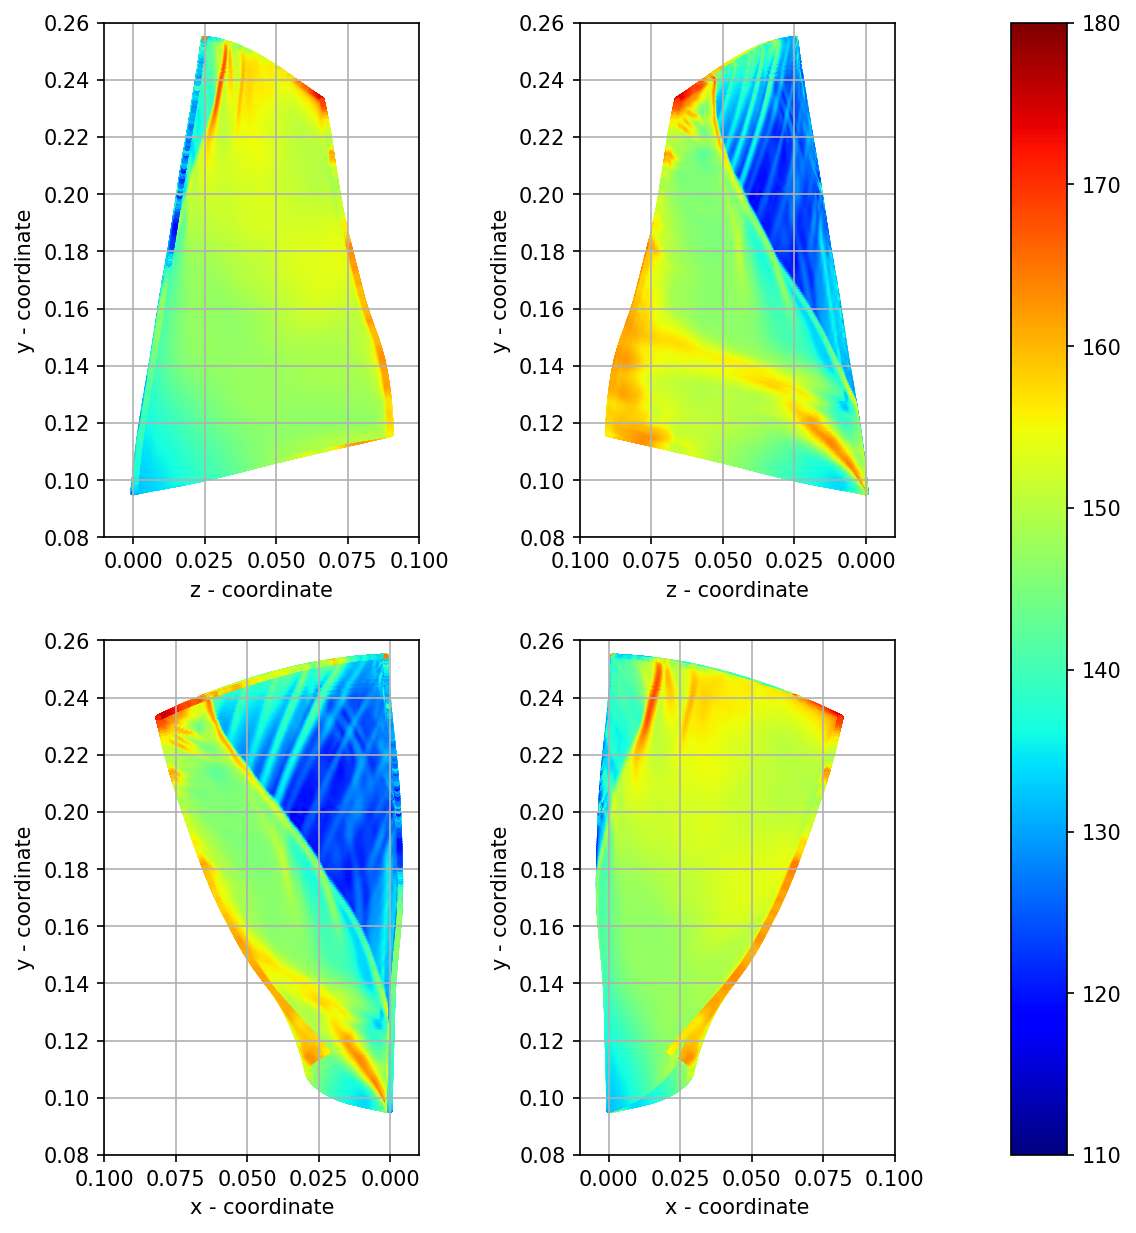

In [20]:
os.chdir(path_rms)

data_pside = pd.DataFrame(pd.read_csv('pside-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_pside = data_pside['rms_spldb']

data_sside = pd.DataFrame(pd.read_csv('sside-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_sside = data_sside['rms_spldb']

data_lead = pd.DataFrame(pd.read_csv('lead-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_lead = data_lead['rms_spldb']

data_trail = pd.DataFrame(pd.read_csv('trail-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_trail = data_trail['rms_spldb']

data_tip = pd.DataFrame(pd.read_csv('tip-rms.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
spl_tip = data_tip['rms_spldb']

sound_pressure_plot, ax0 = plt.subplots(2, 2, figsize=(10, 10), dpi=150)
#sound_pressure_plot.suptitle('RMS SPLdB at blade [dB]')

spl_plot = ax0[0][0].scatter(z_sside, y_sside, c=spl_sside, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][0].scatter(z_tip, y_tip, c=spl_tip, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][0].scatter(z_trail, y_trail, c=spl_trail, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][0].scatter(z_pside, y_pside, c=spl_pside, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][0].scatter(z_lead, y_lead, c=spl_lead, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][0].set_aspect('equal', 'box')
ax0[0][0].set_xlim(-0.01, 0.1)
ax0[0][0].set_ylim(0.08, 0.260)
ax0[0][0].set_xlabel('z - coordinate')
ax0[0][0].set_ylabel('y - coordinate')
ax0[0][0].grid()

ax0[0][1].scatter(z_lead, y_lead, c=spl_lead, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][1].scatter(z_pside, y_pside, c=spl_pside, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][1].scatter(z_trail, y_trail, c=spl_trail, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][1].scatter(z_tip, y_tip, c=spl_tip, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][1].scatter(z_sside, y_sside, c=spl_sside, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[0][1].set_aspect('equal', 'box')
ax0[0][1].set_xlim(-0.01, 0.1)
ax0[0][1].set_ylim(0.08, 0.260)
ax0[0][1].invert_xaxis()
ax0[0][1].set_xlabel('z - coordinate')
ax0[0][1].set_ylabel('y - coordinate')
ax0[0][1].grid()

ax0[1][0].scatter(x_trail, y_trail, c=spl_trail, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][0].scatter(x_pside, y_pside, c=spl_pside, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][0].scatter(x_sside, y_sside, c=spl_sside, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][0].scatter(x_tip, y_tip, c=spl_tip, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][0].scatter(x_lead, y_lead, c=spl_lead, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][0].set_aspect('equal', 'box')
ax0[1][0].set_xlim(-0.01, 0.1)
ax0[1][0].set_ylim(0.08, 0.260)
ax0[1][0].invert_xaxis()
ax0[1][0].set_xlabel('x - coordinate')
ax0[1][0].set_ylabel('y - coordinate')
ax0[1][0].grid()

ax0[1][1].scatter(x_lead, y_lead, c=spl_lead, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][1].scatter(x_tip, y_tip, c=spl_tip, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][1].scatter(x_sside, y_sside, c=spl_sside, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][1].scatter(x_pside, y_pside, c=spl_pside, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][1].scatter(x_trail, y_trail, c=spl_trail, s=2, cmap=plt.cm.jet, vmin=110, vmax=180)
ax0[1][1].set_aspect('equal', 'box')
ax0[1][1].set_xlim(-0.01, 0.1)
ax0[1][1].set_ylim(0.08, 0.260)
ax0[1][1].set_xlabel('x - coordinate')
ax0[1][1].set_ylabel('y - coordinate')
ax0[1][1].grid()

sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="vertical", pad=0.1)
#plt.show()

os.chdir(path_plots)
plt.savefig('blade-rms-spldb.png', bbox_inches='tight')